<a href="https://colab.research.google.com/github/habib-153/AI-ML/blob/main/module_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
#sklearn preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


#Regression model

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



from sklearn.ensemble import VotingRegressor, StackingRegressor


#metrices

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [5]:
uploaded = files.upload()
df = pd.read_csv('bangladesh_student_performance.csv')
df.head()

Saving bangladesh_student_performance.csv to bangladesh_student_performance.csv


,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94


In [7]:
!pip install ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.4 MB/s eta 0:00:00


In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Bangladesh Student performance prediction', explorative = True)

profile.to_file("ydata.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 45.47it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
len(df.columns)

16

In [10]:
df.columns= [
    'date','st_gender','st_age','st_address',
    'st_fam_size','pstatus','m_edu','f_edu',
    'm_job','f_job','st_relationship',
    'smoker','tuition_fee','time_with_friends',
    'ssc_result','hsc_result'
]

In [11]:
if 'date' in df.columns:
  df.drop( columns = ['date'], inplace=True )

In [12]:
df.columns.size

15

In [13]:
df.shape

(2018, 15)

In [14]:
corr_target = df.select_dtypes(include=np.number).corr()['hsc_result'].sort_values(ascending=False)
print(corr_target)

hsc_result           1.000000
ssc_result           0.950178
m_edu                0.063776
f_edu                0.054811
tuition_fee          0.038068
st_age              -0.009857
time_with_friends   -0.156356
Name: hsc_result, dtype: float64


# Scale X And Y

In [15]:
X = df.drop('hsc_result', axis=1)
y = df['hsc_result']

#Numerical Column and Categorical Columns

In [17]:
numerical_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

print(f"Numerical Feature : {numerical_features}")
print(f"Categorical Feature : {categorical_features}")

Numerical Feature : Index(['st_age', 'm_edu', 'f_edu', 'tuition_fee', 'time_with_friends',
       'ssc_result'],
      dtype='object')
Categorical Feature : Index(['st_gender', 'st_address', 'st_fam_size', 'pstatus', 'm_job', 'f_job',
       'st_relationship', 'smoker'],
      dtype='object')


#pipeline

In [19]:
num_tranformer = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

In [20]:
# Categorical
cat_tranformer = Pipeline(
    steps= [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_tranformer,numerical_features),
        ('cat',cat_tranformer,categorical_features)
    ]
    )

# Ensemble - boosting, stacking

In [23]:
#base learner
reg_lr = LinearRegression()
reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [24]:
#Voting regressor
voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg_lr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ]
)

In [25]:
#stacking

stacking_reg = StackingRegressor(
    estimators= [
        ('rf',reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator= Ridge() #the meta learner
)

#Model Training

In [26]:
model_to_train = {
    'Linear Regression': reg_lr,
    'Random Forest': reg_rf,
    'Gradient Boosting': reg_gb,
    'Voting Regressor': voting_reg,
    'Stacking Regressor': stacking_reg
}

In [31]:
#evaluation
results = []

for model_name, model in model_to_train.items():
  pipeline = Pipeline(
      [
  ('preprocessor', preprocessor),
  ('model', model)
      ]
  )

  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  results.append({
      'Model': model_name,
      'MAE': mae,
      'RMSE': rmse,
      'R2 Score': r2
  })

results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df)

                Model       MAE      RMSE  R2 Score
4  Stacking Regressor  0.097738  0.122315  0.960094
2   Gradient Boosting  0.097982  0.122703  0.959840
3    Voting Regressor  0.098811  0.123997  0.958989
1       Random Forest  0.105572  0.131990  0.953531
0   Linear Regression  0.110812  0.141443  0.946636


#Vizualization

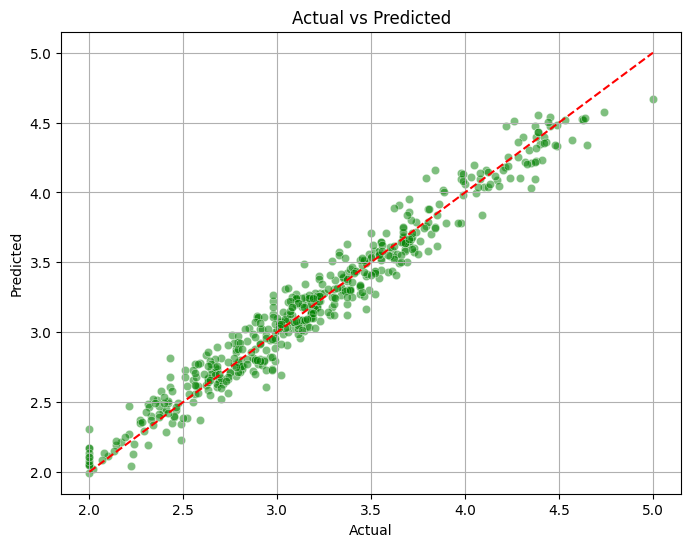

In [36]:
best_model = model_to_train[results_df.iloc[0]['Model']]
# print(best_model)

final_pipeline = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('model', best_model)
    ]
)

final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)

#plot Actual vs predicted
plt.figure( figsize = (8,6) )
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='teal')
plt.plot([2,5], [2,5], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()